___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 


## Import Libraries


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [ ]:
df=pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [ ]:
df.head(5)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Exploratory data analysis

As the data is classfied we will use only pair plot

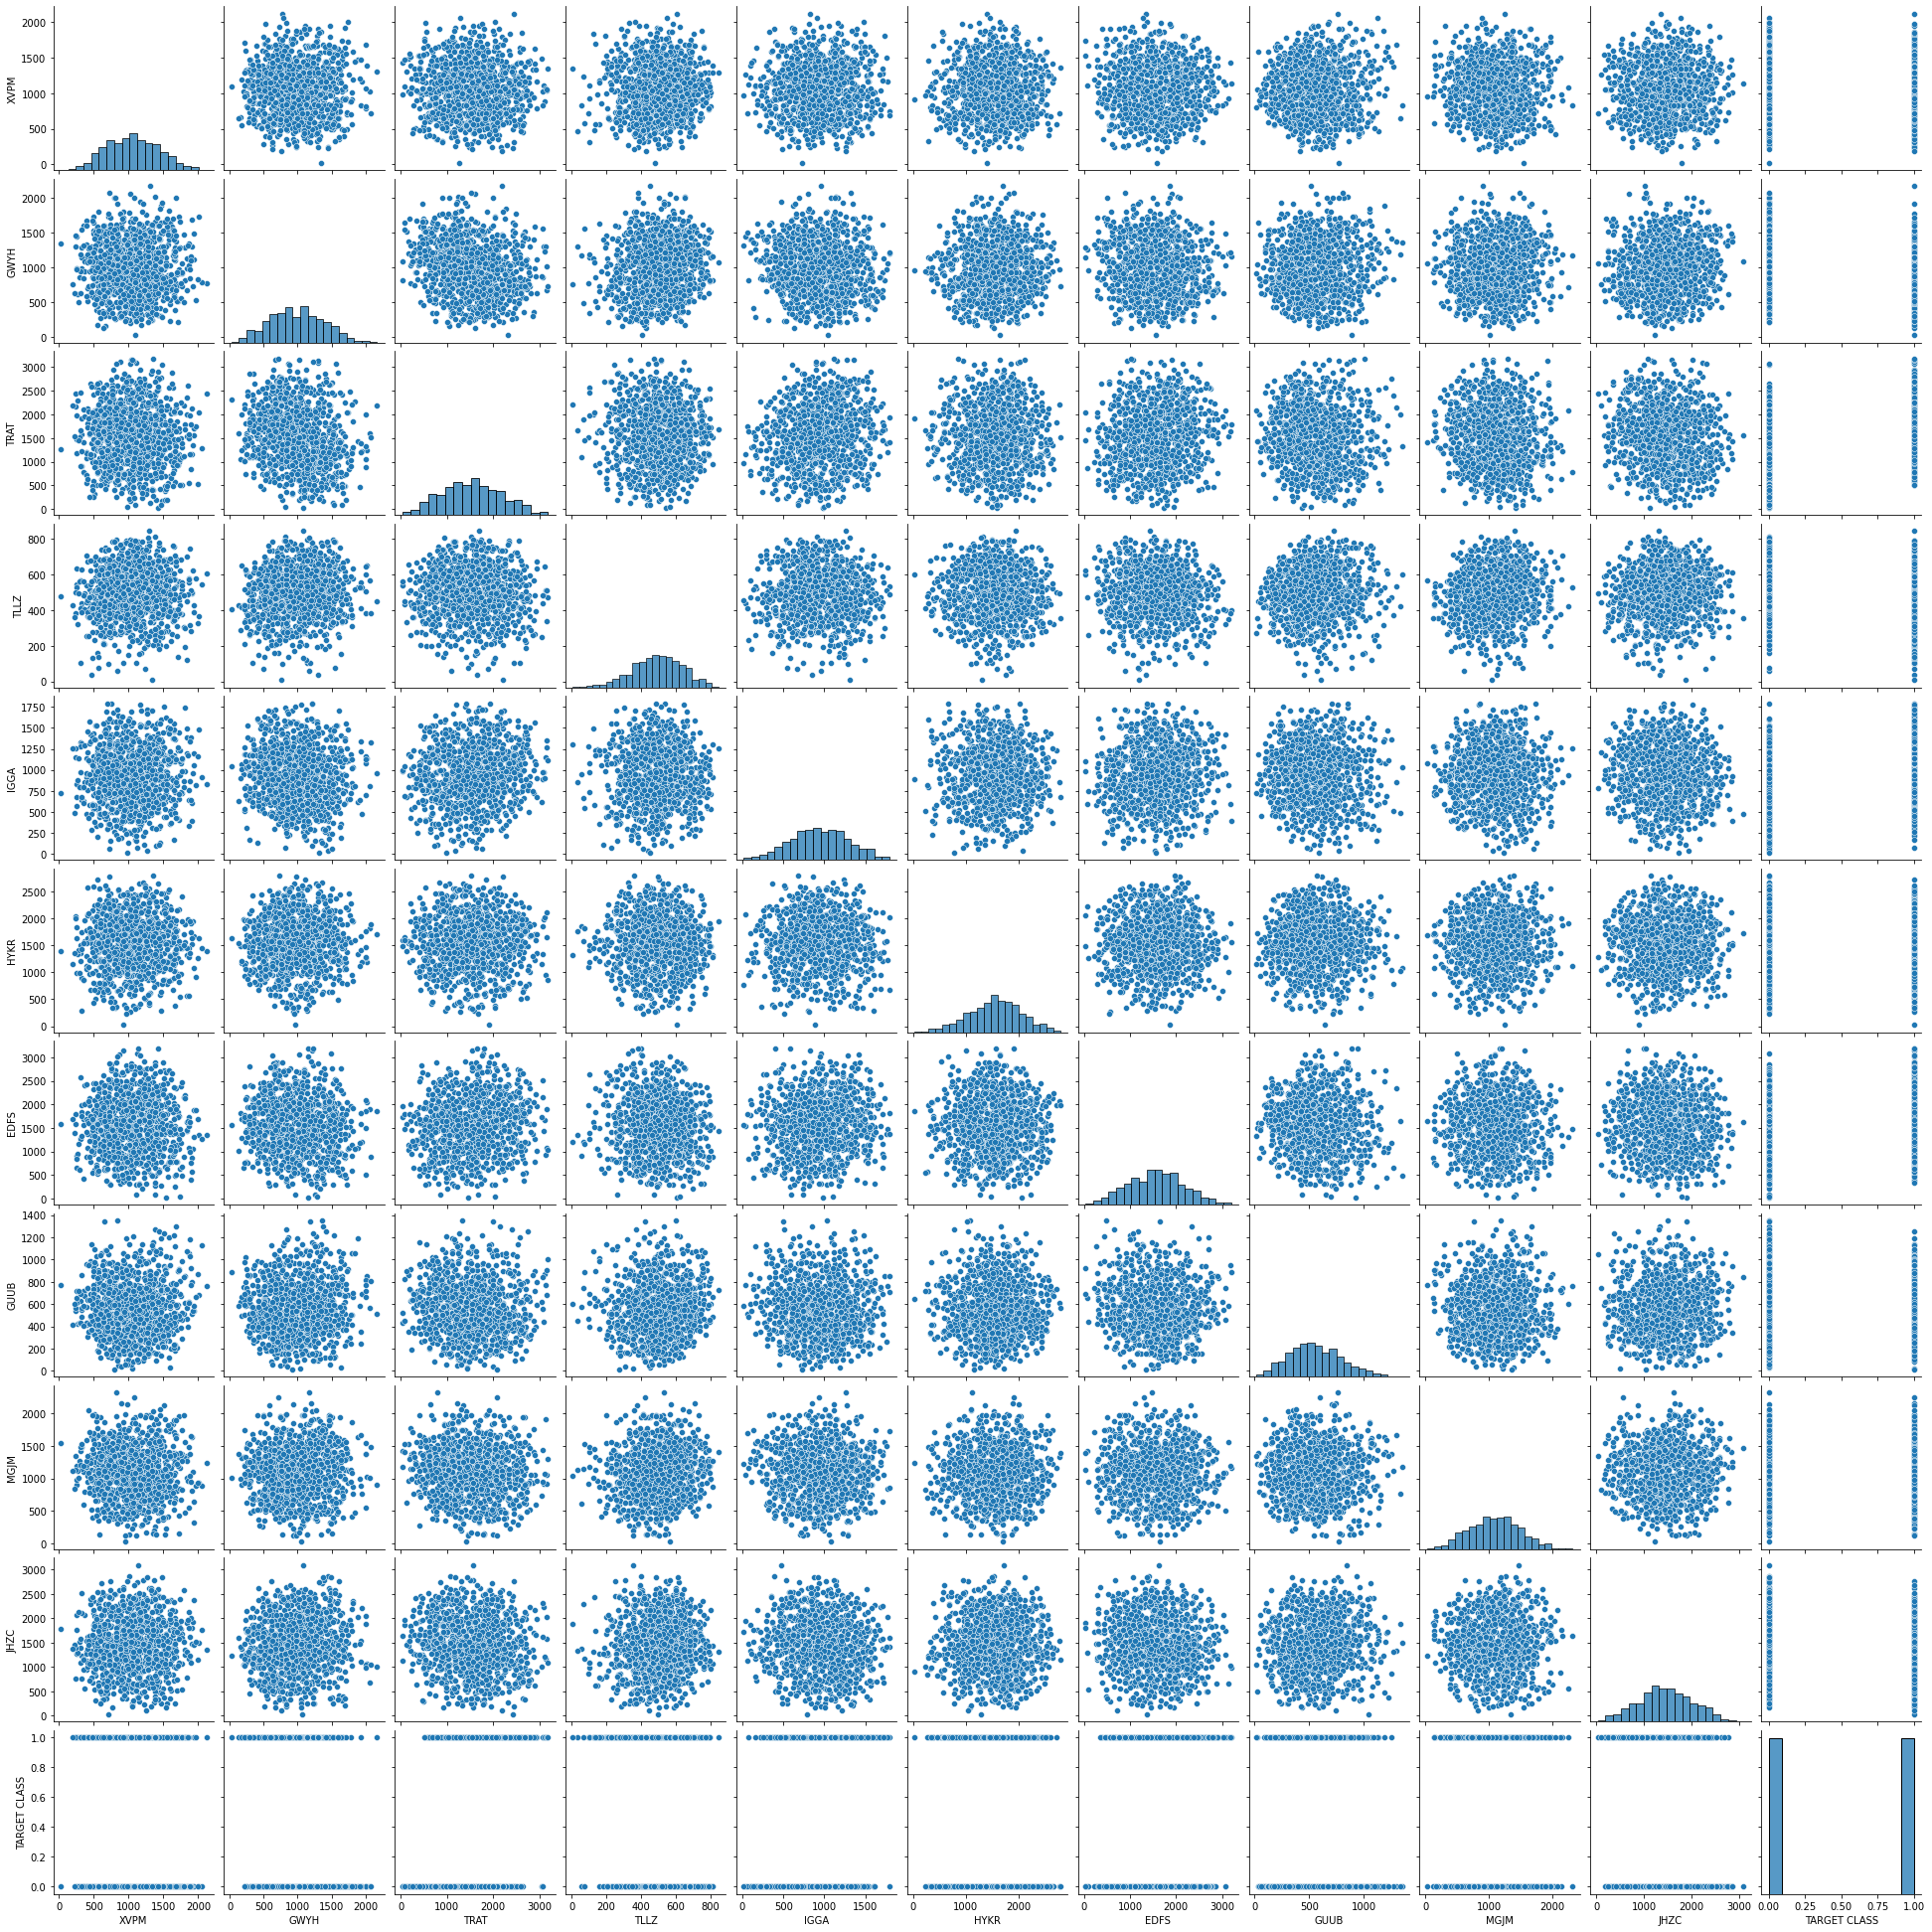

In [ ]:
sns.pairplot(df)

# Standardize the Variables


In [ ]:
from sklearn.preprocessing import StandardScaler



 Creating a StandardScaler() object called scaler.

In [ ]:
scaler=StandardScaler()

 Fit scaler to the features

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
scaled_features1=pd.DataFrame(scaled_features,columns=df.columns[:-1])

# Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=scaled_features1
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


**Create a KNN model instance with n_neighbors=1**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Fit this KNN model to the training data.**

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations


**Use the predict method to predict values using your KNN model and X_test.**

In [ ]:
pred=knn.predict(X_test)

###  Create a confusion matrix and classification report.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300

[[110  36]
 [ 47 107]]


In [ ]:
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Using elbow method we will choose optimum k value that will give us the best class prediction

In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred=knn.predict(X_test)
  error_rate.append(np.mean(pred!=y_test))


**Now create the following plot using the information from your for loop.**

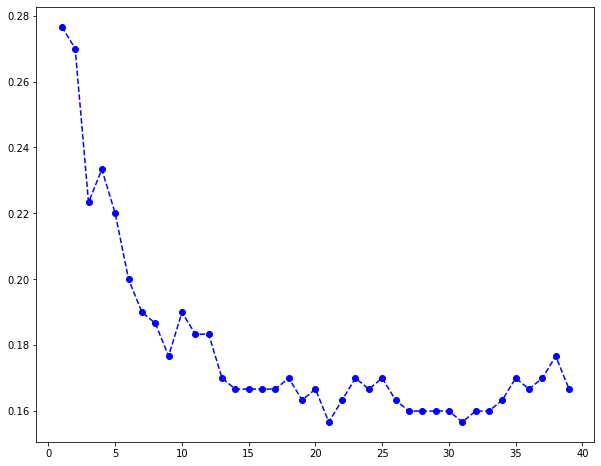

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')

## Retrain with new K Value

We can clearly see that the evaluation metrics give better results

In [ ]:
  knn=KNeighborsClassifier(n_neighbors=22)
  knn.fit(X_train,y_train)
  pred=knn.predict(X_test)
  from sklearn.metrics import classification_report,confusion_matrix
  print(classification_report(y_test,pred))
  print(confusion_matrix(y_test,pred))
 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.87      0.80      0.83       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[128  18]
 [ 31 123]]
